In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplt 

In [3]:
df=pd.read_excel("D:/ML Project/Flight_price_data/Data_Train.xlsx")

In [4]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.shape

(10683, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df[df['Total_Stops'].isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

Since the missing value cant be imputed, lets drop it.

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [13]:
def create_timestamp(col):
    df[col]=pd.to_datetime(df[col])

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    create_timestamp(feature)

C:\Users\SUMIRANA ADITHYA\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\SUMIRANA ADITHYA\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\SUMIRANA ADITHYA\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\SUMIRANA ADITHYA\AppData\Roaming\Python\Python38\site-packages\p

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [17]:
df['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [18]:
df['journey_day']=df['Date_of_Journey'].dt.day

In [19]:
df['journey_month']=df['Date_of_Journey'].dt.month

In [20]:
df['journey_year']=df['Date_of_Journey'].dt.year

In [21]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2022-06-29 22:20:00 2022-03-22 01:10:00   2h 50m    non-stop   
1 2022-06-29 05:50:00 2022-06-29 13:15:00   7h 25m     2 stops   
2 2022-06-29 09:25:00 2022-06-10 04:25:00      19h     2 stops   
3 2022-06-29 18:05:00 2022-06-29 23:30:00   5h 25m      1 stop   
4 2022-06-29 16:50:00 2022-06-29 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  journey_day  journey_month  journey_year  
0         No info   3897           24              3          2019  
1         No info   7662            5              1          2019  
2         No info  13882            6              9          2019  
3         No info   6218            5             12          2019  
4         No info  13302            3              1          2019

In [22]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
def hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_min']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(1)

In [24]:
hour_min(df,'Arrival_Time')

Airline    Source Destination      Route            Dep_Time Duration  \
0  IndiGo  Banglore   New Delhi  BLR → DEL 2022-06-29 22:20:00   2h 50m   

  Total_Stops Additional_Info  Price  journey_day  journey_month  \
0    non-stop         No info   3897           24              3   

   journey_year  Arrival_Time_hour  Arrival_Time_min  
0          2019                  1                10

In [25]:
hour_min(df,'Dep_Time')

Airline    Source Destination      Route Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price  journey_day  journey_month  journey_year  \
0         No info   3897           24              3          2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  
0                  1                10             22            20

In [26]:

def flight_dep_time(x):
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

In [27]:
df['Dep_Time_hour'].apply(flight_dep_time)

0             Night
1        Early mrng
2           Morning
3           Evening
4              Noon
            ...    
10678       Evening
10679       Evening
10680    Early mrng
10681       Morning
10682       Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [28]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [29]:
cf.go_offline()

In [30]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',color='purple')

In [31]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [32]:
df['Duration']=df['Duration'].apply(preprocess_duration)

In [33]:
df['Duration_hours']=df['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [34]:
df['Duration_mins']=df['Duration'].apply(lambda l: int(l.split(' ')[1][:-1]))

In [35]:
df.head(1)

Airline    Source Destination      Route Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price  journey_day  journey_month  journey_year  \
0         No info   3897           24              3          2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  \
0                  1                10             22            20   

   Duration_hours  Duration_mins  
0               2             50

In [36]:
df['Duration_total_mins']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [37]:
df.head(1)

Airline    Source Destination      Route Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price  journey_day  journey_month  journey_year  \
0         No info   3897           24              3          2019   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  \
0                  1                10             22            20   

   Duration_hours  Duration_mins  Duration_total_mins  
0               2             50                  170

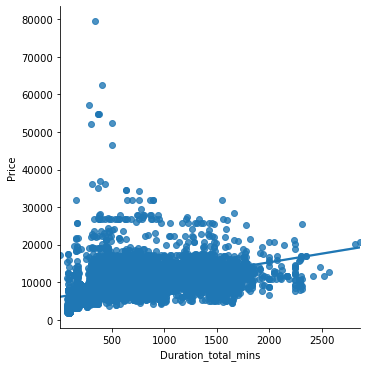

In [38]:
sns.lmplot(x='Duration_total_mins',y='Price',data=df)

In [39]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [40]:
df['Destination'].value_counts().iplot(kind='bar')

In [41]:
import plotly.express as px

In [42]:
px.box(df,x='Airline',y='Price',height=1200,width=1400,color='Airline')

In [43]:
px.violin(df,x='Airline',y='Price',height=700,width=2000,color='Airline',box=True,points='all')

In [44]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Since in nearly most of cases this column doesnt have enough sample space, we will be dropping this column, as well as the column "Route", we will aslo drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

In [45]:
df.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [46]:
df.head(1)

Airline    Source Destination Duration Total_Stops  Price  journey_day  \
0  IndiGo  Banglore   New Delhi   2h 50m    non-stop   3897           24   

   journey_month  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0              3                  1                10             22   

   Dep_Time_min  Duration_hours  Duration_mins  
0            20               2             50

In [47]:
cat_col=[col for col in df.columns if df[col].dtype=='object']

In [48]:
num_col=[col for col in df.columns if df[col].dtype!='object']

In [49]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [50]:
 num_col

['Price',
 'journey_day',
 'journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Duration_hours',
 'Duration_mins']

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',dtype='int64')

In [52]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Source']]).toarray())

In [53]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
df['Source'].head(10)

0    Banglore
1     Kolkata
2       Delhi
3     Kolkata
4    Banglore
5     Kolkata
6    Banglore
7    Banglore
8    Banglore
9       Delhi
Name: Source, dtype: object

In [55]:
encoder_df.head(10)

0  1  2  3  4
0  1  0  0  0  0
1  0  0  0  1  0
2  0  0  1  0  0
3  0  0  0  1  0
4  1  0  0  0  0
5  0  0  0  1  0
6  1  0  0  0  0
7  1  0  0  0  0
8  1  0  0  0  0
9  0  0  1  0  0

0-> Bangalore
1-> Chennai
2-> Delhi
3-> Kolkata
4-> Mumbai

In [56]:
encoder_df.columns=['Source_Bangalore','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai']

In [57]:
encoder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Source_Bangalore  10682 non-null  int64
 1   Source_Chennai    10682 non-null  int64
 2   Source_Delhi      10682 non-null  int64
 3   Source_Kolkata    10682 non-null  int64
 4   Source_Mumbai     10682 non-null  int64
dtypes: int64(5)
memory usage: 417.4 KB


In [58]:
encoder_df.head(10)

Source_Bangalore  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                 1               0             0               0   
1                 0               0             0               1   
2                 0               0             1               0   
3                 0               0             0               1   
4                 1               0             0               0   
5                 0               0             0               1   
6                 1               0             0               0   
7                 1               0             0               0   
8                 1               0             0               0   
9                 0               0             1               0   

   Source_Mumbai  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [59]:
df=df.join(encoder_df)

In [60]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Dep_Time_hour', 'Dep_Time_min', 'Duration_hours', 'Duration_mins',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai'],
      dtype='object')

In [61]:
df.drop(columns=['Source'],axis=1,inplace=True)

In [62]:
df.head(1)

Airline Destination Duration Total_Stops  Price  journey_day  journey_month  \
0  IndiGo   New Delhi   2h 50m    non-stop   3897           24              3   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  \
0                  1                10             22            20   

   Duration_hours  Duration_mins  Source_Bangalore  Source_Chennai  \
0               2             50               1.0             0.0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  
0           0.0             0.0            0.0

In [63]:
df=df.fillna(0)

In [64]:
df['Source_Chennai']=df['Source_Chennai'].astype(dtype='int64')


In [65]:
df['Source_Mumbai']=df['Source_Mumbai'].astype(dtype='int64')
df['Source_Bangalore']=df['Source_Bangalore'].astype(dtype='int64')
df['Source_Delhi']=df['Source_Delhi'].astype(dtype='int64')
df['Source_Kolkata']=df['Source_Kolkata'].astype(dtype='int64')

In [66]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [67]:
airlines=df.groupby(['Airline'])['Price'].mean().sort_values().index

In [68]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [69]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [70]:
df['Airline']=df['Airline'].map(dict1)

In [71]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [72]:
df.head(1)

Airline Destination Duration Total_Stops  Price  journey_day  \
0        3   New Delhi   2h 50m    non-stop   3897           24   

   journey_month  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0              3                  1                10             22   

   Dep_Time_min  Duration_hours  Duration_mins  Source_Bangalore  \
0            20               2             50                 1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  
0               0             0               0              0

In [73]:
df['Destination'].replace('New Delhi','Delhi',inplace=True) ###assuming new delhi and delhi as the same

In [74]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [75]:
dest=df.groupby(['Destination'])['Price'].mean().sort_values().index

In [76]:
dict2={key:index for index,key in enumerate(dest,0)}

In [77]:
df['Destination']=df['Destination'].map(dict2)

In [78]:
df.head(1)

Airline  Destination Duration Total_Stops  Price  journey_day  \
0        3            2   2h 50m    non-stop   3897           24   

   journey_month  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0              3                  1                10             22   

   Dep_Time_min  Duration_hours  Duration_mins  Source_Bangalore  \
0            20               2             50                 1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  
0               0             0               0              0

In [79]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [81]:
df['Total_Stops']=df['Total_Stops'].map(stops)

In [82]:
df.head(1)

Airline  Destination Duration  Total_Stops  Price  journey_day  \
0        3            2   2h 50m            0   3897           24   

   journey_month  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0              3                  1                10             22   

   Dep_Time_min  Duration_hours  Duration_mins  Source_Bangalore  \
0            20               2             50                 1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  
0               0             0               0              0

# Outlier Detection

In [83]:
px.box(df['Price'], x="Price")

In [84]:
px.histogram(df['Price'], x="Price",opacity=1)

In [85]:
import plotly.figure_factory as ff

In [86]:
x=df['Price']

In [87]:
x

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [88]:
hist_data = [x]
group_labels = ['distplot']

In [89]:
ff.create_distplot(hist_data, group_labels,bin_size=1000)

In [90]:
df['Price']=np.where(df['Price']>=35000,df['Price'].median(),df['Price'])

In [91]:
px.box(df['Price'], x="Price")

In [92]:
px.histogram(df['Price'], x="Price",opacity=1)

In [93]:
ff.create_distplot([df['Price']], group_labels,bin_size=1000)

In [94]:
df.head(1)

Airline  Destination Duration  Total_Stops   Price  journey_day  \
0        3            2   2h 50m            0  3897.0           24   

   journey_month  Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  \
0              3                  1                10             22   

   Dep_Time_min  Duration_hours  Duration_mins  Source_Bangalore  \
0            20               2             50                 1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  
0               0             0               0              0

In [95]:
df.drop(columns=['Duration'],axis=1,inplace=True)

In [96]:
df.head(1)

Airline  Destination  Total_Stops   Price  journey_day  journey_month  \
0        3            2            0  3897.0           24              3   

   Arrival_Time_hour  Arrival_Time_min  Dep_Time_hour  Dep_Time_min  \
0                  1                10             22            20   

   Duration_hours  Duration_mins  Source_Bangalore  Source_Chennai  \
0               2             50                 1               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  
0             0               0              0

In [97]:
df.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
journey_day            int64
journey_month          int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Dep_Time_hour          int64
Dep_Time_min           int64
Duration_hours         int64
Duration_mins          int64
Source_Bangalore       int64
Source_Chennai         int64
Source_Delhi           int64
Source_Kolkata         int64
Source_Mumbai          int64
dtype: object

# Training Model

In [98]:
from sklearn.feature_selection import mutual_info_regression

In [99]:
X=df.drop(['Price'],axis=1)

In [100]:
y=df['Price']

In [101]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
journey_day          int64
journey_month        int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
Dep_Time_hour        int64
Dep_Time_min         int64
Duration_hours       int64
Duration_mins        int64
Source_Bangalore     int64
Source_Chennai       int64
Source_Delhi         int64
Source_Kolkata       int64
Source_Mumbai        int64
dtype: object

In [102]:
mutual_info_regression(X,y)

array([0.96809119, 0.99674989, 0.79988433, 0.18497887, 0.24822647,
       0.39780744, 0.34224196, 0.3362842 , 0.26387155, 0.46588118,
       0.33405487, 0.25835882, 0.09759057, 0.33431975, 0.30742676,
       0.12501593])

In [103]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [104]:
imp.sort_values(by='importance',ascending=False)

importance
Destination          1.010873
Airline              0.968175
Total_Stops          0.794682
Duration_hours       0.471291
Arrival_Time_hour    0.396021
Arrival_Time_min     0.349358
Duration_mins        0.346452
Dep_Time_hour        0.339423
Source_Delhi         0.336831
Source_Kolkata       0.305360
Source_Bangalore     0.269252
Dep_Time_min         0.255564
journey_month        0.246756
journey_day          0.194567
Source_Mumbai        0.128857
Source_Chennai       0.095917

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
ml_model=RandomForestRegressor()

In [109]:
model=ml_model.fit(X_train,y_train)

# Testing Model

In [110]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    fig=ff.create_distplot([y_test-y_prediction],group_labels,bin_size=100)
    fig.show()

In [111]:
predict(RandomForestRegressor())

Training_score: 0.9558817614796845
Predictions are : [16751.59  6510.02  8793.36 ...  3480.05  6341.49  7048.86]


r2_score: 0.8103363094199842
MSE :  3692296.799279761
MAE :  1181.7986557516385
RMSE :  1921.5350112032206


# Tuning the hyperparameters

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [113]:
reg_rf=RandomForestRegressor()

In [114]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [115]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [116]:
grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [124]:
rf_Random=RandomizedSearchCV(estimator=reg_rf,param_distributions=grid,cv=3,verbose=2,n_jobs=-1)

In [153]:
ref_rand_model=rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [139]:
predict(rf_Random)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training_score: 0.9199624518242286
Predictions are : [16496.55884677  6317.0182607   8642.08184497 ...  3669.81332231
  6842.32419597  7005.68521229]


r2_score: 0.8263162171103968
MSE :  3381206.3536722804
MAE :  1148.7030727818503
RMSE :  1838.8056867630903


In [140]:
import pickle
from sklearn import metrics

In [149]:
with open('rf_model', 'wb') as files:
    pickle.dump(ref_rand_model, files)

In [150]:
    with open('rf_model' , 'rb') as f:
        saved_reg_rf = pickle.load(f)

In [151]:
saved_reg_rf.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
r2_score=metrics.r2_score(y_test,lr.predict(X_test))

In [ ]:
print('r2_score: {}'.format(r2_score))
print('MSE : ', metrics.mean_squared_error(y_test,lr.predict(X_test)))
print('MAE : ', metrics.mean_absolute_error(y_test,lr.predict(X_test)))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))
fig=ff.create_distplot([y_test-lr.predict(X_test)],group_labels,bin_size=100)
fig.show()